In [1]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from math import ceil

def translatePx (px, n):
    px[0] = max(min(px[0] + n, 255), 0)
    px[1] = max(min(px[1] + n, 255), 0)
    px[2] = max(min(px[2] + n, 255), 0)
    return px

def clampValue(v):
    return max(min(v, 255), 0)

def applyPunctualTransformation(transformation, img):
    originalSize = (img.size[0], img.size[1], 3)
    flattened = np.array(img).reshape((img.size[0] * img.size[1], 3))
    newImg = []
    for px in flattened:
        newPx = transformation(px)
        newImg.append(newPx)
    newImg = np.array(newImg).reshape(originalSize)
    return newImg

BlurMatrix = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

EnhanceMatrix = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

EdgesMatrix = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

GeoMatrix = [
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
]

def applyKernelMatrix(kernel, matrix, center):
    kernelCenterIndex = ceil(len(kernel)/2)
    kernelCenter = (kernelCenterIndex, kernelCenterIndex)
    kernelLen = len(kernel)
    matrixLen = len(matrix)
    sum0 = 0
    sum1 = 0
    sum2 = 0
    for i in range(kernelLen):
        for j in range(kernelLen):
            x, y = int(i - kernelCenterIndex + center[0]), int(j - kernelCenterIndex + center[1])
            if (x >= 0 and x < matrixLen) and (y >= 0 and y < matrixLen):
                sum0 = sum0 + kernel[i][j] * matrix[x][y][0] 
                sum1 = sum1 + kernel[i][j] * matrix[x][y][1] 
                sum2 = sum2 + kernel[i][j] * matrix[x][y][2] 

    return [clampValue(sum0/9), clampValue(sum1/9), clampValue(sum2/9)]
                         
def applyFilter(t, img):
    originalSize = (img.size[0], img.size[1], 3)
    matrix = np.array(img).reshape(originalSize)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i, j] = applyKernelMatrix(t, matrix, (i, j))
    return matrix    

def showImg(img):
    imgArray = np.array(img)
    %matplotlib inline
    imshow(imgArray)
    
def loadImage (img='lena.bmp'):
    return Image.open('Images/'+img)

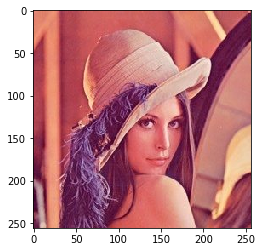

In [2]:
img = loadImage()

showImg(img)

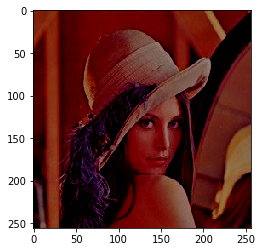

In [3]:
img = loadImage()

newImg = applyPunctualTransformation(lambda px: translatePx(px, -100), img)

showImg(newImg)

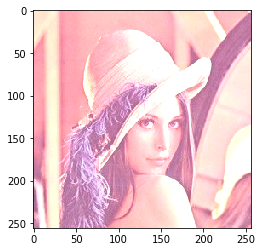

In [4]:
img = loadImage()

newImg = applyPunctualTransformation(lambda px: translatePx(px, 100) , img)

showImg(newImg)

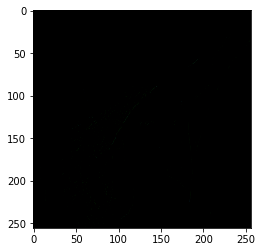

In [5]:
img = loadImage()
newImg = applyFilter(EdgesMatrix, img)
showImg(newImg)

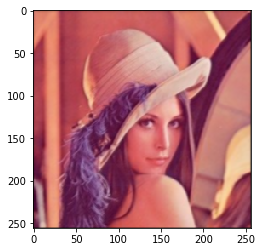

In [6]:
img = loadImage()
newImg = applyFilter(BlurMatrix, img)
showImg(newImg)

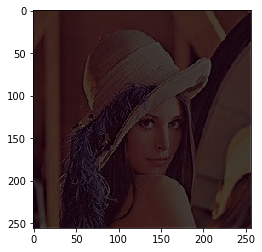

In [7]:
img = loadImage()
newImg = applyFilter(EnhanceMatrix, img)
showImg(newImg)

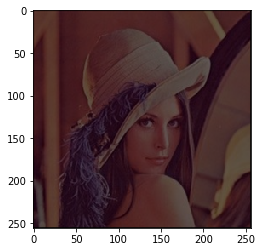

In [8]:
img = loadImage()
newImg = applyFilter(GeoMatrix, img)
showImg(newImg)

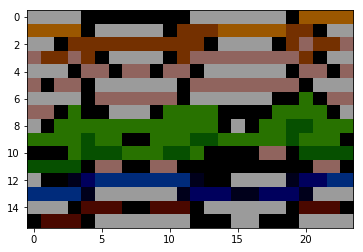

In [10]:
img = Image.open('Images/guy.bmp')
# size = (5, 5, 3)
# i = [a*13 % 256 for a in range(size[0]*size[1]*size[2])]
# i  = np.array(i).reshape(size)
# im = Image.fromarray(i.astype(np.uint8))

newImg = applyPunctualTransformation(lambda px: translatePx(px, -100), img)
showImg(newImg)
# showImg(im)